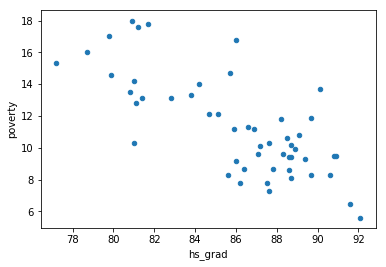

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_csv('C:/Users/USER/Downloads/states.csv')
df.head()
df.plot.scatter(x='hs_grad', y= 'poverty')

In [8]:
df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


In [9]:
df.corr(method='pearson', min_periods=1)

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y_data = df['poverty'].values.reshape(-1, 1)
x_data = df['hs_grad'].values.reshape(-1, 1)
reg.fit(x_data, y_data)
reg.coef_

array([[-0.62121672]])

In [19]:
import statsmodels.formula.api as sm
result = sm.ols(formula="poverty ~ hs_grad + metro_res + white + female_house", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           8.88e-10
Time:                        15:39:20   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""